# Proyek Klasifikasi Gambar: Dataset Batik Indonesia 🎨oleh Rama Syailana Dewa (ramasyailana3@gmail.com)
Peneliti: Rama Syailana Dewa
<br>Institusi: Universitas Amikom Yogyakarta
<br>Judul Penelitian: Perbandingan Hyperparameter Tuning Berbasis Transfer Learning dalam Klasifikasi Citra Batik

## ⏱️ **COMPUTATION TIME TRACKING**

### 🎯 **TUJUAN PENELITIAN EFISIENSI KOMPUTASIONAL**

Sesuai dengan rumusan masalah penelitian:

> **"Bagaimana perbandingan efisiensi komputasional waktu tuning, sumber daya yang dibutuhkan antara metode-metode Hyperparameter Tuning yang diterapkan pada model Transfer Learning untuk klasifikasi citra batik?"**

### 📊 **METRICS YANG DITRACK:**

1. **⏱️ Total Waktu Komputasi**: Waktu total dari awal sampai selesai
2. **🚀 Waktu Training**: Waktu yang dibutuhkan untuk training model
3. **📊 Waktu Evaluasi**: Waktu yang dibutuhkan untuk evaluasi model
4. **💾 Memory Usage**: Penggunaan memori selama proses
5. **🖥️ CPU Usage**: Penggunaan CPU selama proses
6. **📅 Timestamp**: Waktu mulai dan selesai

### 🔧 **IMPLEMENTASI:**

- **ComputationTimeTracker**: Class untuk tracking waktu komputasi
- **Resource Monitoring**: Monitoring penggunaan sistem
- **JSON Export**: Menyimpan hasil timing untuk analisis
- **Real-time Logging**: Log progress selama proses

### 📈 **MANFAAT:**

1. **Perbandingan Efisiensi**: Dapat membandingkan waktu komputasi antar metode
2. **Resource Optimization**: Mengetahui penggunaan resource yang optimal
3. **Cost Analysis**: Analisis biaya komputasi untuk penelitian
4. **Reproducibility**: Memastikan hasil dapat direproduksi dengan timing yang konsisten

### 🎯 **SESUAI TUJUAN PENELITIAN:**

> **"Menghasilkan data perbandingan terukur mengenai efisiensi komputasional meliputi waktu tuning dan estimasi kebutuhan sumber daya dari penerapan ketiga metode Hyperparameter Tuning tersebut pada model Transfer Learning MobileNetV2 untuk tugas klasifikasi citra batik."**


**Deskripsi Dataset:** Dataset berisi **lebih dari 32.000 gambar pola batik** yang terbagi ke dalam **60 jenis batik**. Tujuan dari proyek ini adalah untuk membangun **model** yang mampu **mendeteksi penyakit pola batik** dan dapat **digunakan di berbagai platform**.Sumber: [Mendeley Data](https://www.kaggle.com/datasets/ashishmotwani/batik)Noted : Menanggapi saran dari Reviewer dicoding untuk menggabungkan terlebih dahulu `train` dan `valid`. Sehingga saya telah menggabungkannya di folder `/data`, lalu saya split `train, val, test` ke folder `dataset/split`

## 📦 Import Semua Packages/Library yang DigunakanMengimpor semua pustaka yang dibutuhkan seperti TensorFlow, NumPy, Matplotlib, dll.

In [1]:
# Standard library
import os
import random
import shutil
from collections import Counter, defaultdict
from sklearn.model_selection import train_test_split

# Third-party packages
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import compute_class_weight

# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from keras.layers import TFSMLayer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    GlobalAveragePooling2D,
    Dense,
    Dropout
)
from tensorflow.keras.applications import InceptionV3, MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator,
    load_img,
    img_to_array
)
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
    ReduceLROnPlateau,
    Callback
)

# Hilangkan warning TensorFlow dan Python
import warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings('ignore')
# =========== TIME TRACKING IMPORTS ===========
import time
import psutil
import os
from datetime import datetime

# =========== COMPUTATION TIME TRACKING ===========
class ComputationTimeTracker:
    """Class untuk tracking waktu komputasi dan resource usage"""
    
    def __init__(self, experiment_name="baseline_model"):
        self.experiment_name = experiment_name
        self.start_time = None
        self.end_time = None
        self.training_time = None
        self.evaluation_time = None
        self.total_time = None
        self.memory_usage = []
        self.cpu_usage = []
        
    def start_tracking(self):
        """Mulai tracking waktu komputasi"""
        self.start_time = time.time()
        self.start_datetime = datetime.now()
        print(f"⏱️  Mulai tracking waktu komputasi: {self.experiment_name}")
        print(f"📅 Waktu mulai: {self.start_datetime.strftime('%Y-%m-%d %H:%M:%S')}")
        
    def track_training_start(self):
        """Track mulai training"""
        self.training_start_time = time.time()
        print(f"🚀 Mulai training model: {self.experiment_name}")
        
    def track_training_end(self):
        """Track selesai training"""
        self.training_end_time = time.time()
        self.training_time = self.training_end_time - self.training_start_time
        print(f"✅ Training selesai dalam {self.training_time:.2f} detik")
        
    def track_evaluation_start(self):
        """Track mulai evaluasi"""
        self.evaluation_start_time = time.time()
        print(f"📊 Mulai evaluasi model: {self.experiment_name}")
        
    def track_evaluation_end(self):
        """Track selesai evaluasi"""
        self.evaluation_end_time = time.time()
        self.evaluation_time = self.evaluation_end_time - self.evaluation_start_time
        print(f"✅ Evaluasi selesai dalam {self.evaluation_time:.2f} detik")
        
    def end_tracking(self):
        """Selesai tracking dan hitung total waktu"""
        self.end_time = time.time()
        self.end_datetime = datetime.now()
        self.total_time = self.end_time - self.start_time
        
        print(f"⏱️  Total waktu komputasi: {self.total_time:.2f} detik")
        print(f"📅 Waktu selesai: {self.end_datetime.strftime('%Y-%m-%d %H:%M:%S')}")
        
    def get_summary(self):
        """Dapatkan ringkasan waktu komputasi"""
        return {
            'experiment_name': self.experiment_name,
            'start_datetime': self.start_datetime.strftime('%Y-%m-%d %H:%M:%S'),
            'end_datetime': self.end_datetime.strftime('%Y-%m-%d %H:%M:%S'),
            'total_time_seconds': self.total_time,
            'training_time_seconds': self.training_time,
            'evaluation_time_seconds': self.evaluation_time,
            'total_time_minutes': self.total_time / 60 if self.total_time else 0,
            'training_time_minutes': self.training_time / 60 if self.training_time else 0,
            'evaluation_time_minutes': self.evaluation_time / 60 if self.evaluation_time else 0
        }
        
    def save_timing_results(self, filename=None):
        """Simpan hasil timing ke file JSON"""
        if filename is None:
            filename = f"{self.experiment_name}_timing_results.json"
            
        results = self.get_summary()
        
        with open(filename, 'w') as f:
            json.dump(results, f, indent=2, ensure_ascii=False)
            
        print(f"💾 Hasil timing disimpan: {filename}")
        return results

# =========== BASELINE MODEL TIMING ===========
baseline_tracker = ComputationTimeTracker("baseline_model")
baseline_tracker.start_tracking()



2025-07-31 22:13:38.524066: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-31 22:13:38.538018: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753974818.554088     883 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753974818.558132     883 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753974818.568644     883 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

⏱️  Mulai tracking waktu komputasi: baseline_model
📅 Waktu mulai: 2025-07-31 22:13:39


In [2]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    print("✅ TensorFlow mendeteksi GPU (CUDA):")
    for gpu in gpus:
        print(f"  - {gpu.name}")
else:
    print("⚠️ TensorFlow TIDAK mendeteksi GPU. Model berjalan di CPU.")

# =========== RESOURCE MONITORING ===========
def get_system_info():
    """Dapatkan informasi sistem"""
    import psutil
    
    cpu_count = psutil.cpu_count()
    memory = psutil.virtual_memory()
    disk = psutil.disk_usage('/')
    
    print(f"🖥️  CPU Cores: {cpu_count}")
    print(f"💾 Memory Total: {memory.total / (1024**3):.2f} GB")
    print(f"💾 Memory Available: {memory.available / (1024**3):.2f} GB")
    print(f"💿 Disk Total: {disk.total / (1024**3):.2f} GB")
    print(f"💿 Disk Free: {disk.free / (1024**3):.2f} GB")
    
    return {
        'cpu_count': cpu_count,
        'memory_total_gb': memory.total / (1024**3),
        'memory_available_gb': memory.available / (1024**3),
        'disk_total_gb': disk.total / (1024**3),
        'disk_free_gb': disk.free / (1024**3)
    }

# Dapatkan informasi sistem
system_info = get_system_info()



✅ TensorFlow mendeteksi GPU (CUDA):
  - /physical_device:GPU:0
🖥️  CPU Cores: 16
💾 Memory Total: 7.63 GB
💾 Memory Available: 5.56 GB
💿 Disk Total: 1006.85 GB
💿 Disk Free: 859.12 GB


## 📁 Data PreparationMenyiapkan folder, struktur data, dan mengecek isi dataset batik Indonesia.

### 📤 Data LoadingMemuat gambar dari dataset ke dalam format yang bisa diproses oleh model.

Ukuran gambar paling umum (top 5):
  (512, 512) → 960 gambar
  (946, 983) → 3 gambar
  (717, 743) → 2 gambar
  (972, 977) → 2 gambar
  (914, 929) → 2 gambar

Jumlah ukuran gambar berbeda: 99


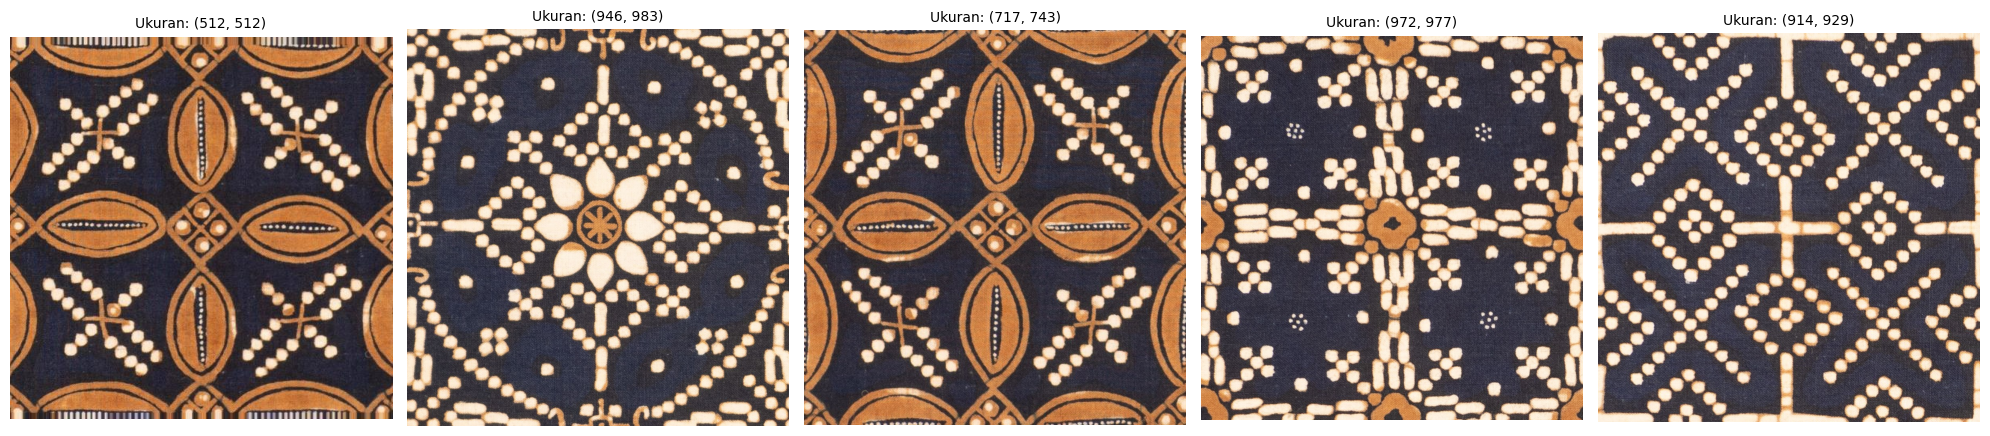

In [5]:
def show_example_images_of_common_sizes(root_dir, top_k=5):
    sets = ['/home/nvidia/Batik-Final/data/processed/Batik Nitik Grouped']
    size_counter = Counter()
    example_paths = defaultdict(str)

    for dataset in sets:
        dataset_path = os.path.join(root_dir, dataset)
        for class_name in os.listdir(dataset_path):
            class_path = os.path.join(dataset_path, class_name)
            if not os.path.isdir(class_path):
                continue

            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                try:
                    with Image.open(img_path) as img:
                        size = img.size
                        size_counter[size] += 1
                        if size not in example_paths:
                            example_paths[size] = img_path
                except:
                    continue  # skip corrupted or unreadable images

    # Ambil top-k ukuran gambar berdasarkan frekuensi kemunculan
    most_common_sizes = size_counter.most_common(top_k)
    print(f"Ukuran gambar paling umum (top {top_k}):")
    for size, count in most_common_sizes:
        print(f"  {size} → {count} gambar")

    print(f"\nJumlah ukuran gambar berbeda: {len(size_counter)}")

    # Tampilkan contoh gambar dari setiap ukuran
    plt.figure(figsize=(4 * top_k, 5))
    for idx, (size, _) in enumerate(most_common_sizes):
        img_path = example_paths[size]
        with Image.open(img_path) as img:
            plt.subplot(1, top_k, idx + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Ukuran: {size}", fontsize=10)
    plt.tight_layout()
    plt.show()

# Contoh penggunaan:
show_example_images_of_common_sizes("", top_k=5)

Kemudian, lanjut mempersiapkan dataset gambar agar bisa dilatih dengan model machine learning. Kita menentukan folder data (`/data`), lalu mengubah semua gambar menjadi ukuran 224x224 piksel dan memprosesnya dalam kelompok (batch) berisi 16 gambar. Fungsi `image_dataset_from_directory` secara otomatis membaca gambar dari subfolder dan mengenali nama subfolder sebagai label kelas. Gambar pelatihan diacak untuk membantu model belajar lebih baik, sedangkan gambar validasi tidak diacak karena hanya untuk evaluasi. Terakhir, daftar nama kelas ditampilkan untuk memastikan label terbaca dengan benar.

### 🧼 Data PreprocessingMelakukan pembagian data batik serta augmentasi data.

#### ✂️ Split Datasetmembagi dataset citra yang tersimpan dalam folder data, di mana setiap subfolder merepresentasikan satu kelas, ke dalam tiga subset: `train (70%)`, `val (15%)`, dan `test (15%)`. Proses dimulai dengan membuat struktur folder `dataset_split/train, val, dan test` untuk setiap kelas. Selanjutnya, semua gambar dalam setiap kelas diacak, kemudian dibagi menggunakan `train_test_split` dari scikit-learn berdasarkan rasio yang ditentukan. Gambar-gambar hasil split kemudian disalin ke folder yang sesuai, memastikan bahwa data pelatihan, validasi, dan pengujian tersebar secara acak namun proporsional, sehingga model dapat dilatih dan diuji secara adil dan akurat pada data yang belum pernah dilihat sebelumnya.

In [ ]:
# # Path awal
# original_dataset_dir = '/home/nvidia/Batik-Final/data/processed/Batik Nitik Grouped'
# output_base_dir = '/home/nvidia/Batik-Final/data/splits/dataset_split'

# # Rasio split
# train_ratio = 0.7
# val_ratio = 0.15
# test_ratio = 0.15

# # Buat folder train/val/test
# for split in ['train', 'val', 'test']:
#     for class_name in os.listdir(original_dataset_dir):
#         os.makedirs(os.path.join(output_base_dir, split, class_name), exist_ok=True)

# # Bagi dataset per kelas
# for class_name in os.listdir(original_dataset_dir):
#     class_path = os.path.join(original_dataset_dir, class_name)
#     if not os.path.isdir(class_path):
#         continue

#     files = os.listdir(class_path)
#     files = [f for f in files if os.path.isfile(os.path.join(class_path, f))]
#     random.shuffle(files)

#     train_files, temp_files = train_test_split(files, test_size=(1 - train_ratio), random_state=42)
#     val_files, test_files = train_test_split(temp_files, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42)

#     for f in train_files:
#         shutil.copy(os.path.join(class_path, f), os.path.join(output_base_dir, 'train', class_name, f))
#     for f in val_files:
#         shutil.copy(os.path.join(class_path, f), os.path.join(output_base_dir, 'val', class_name, f))
#     for f in test_files:
#         shutil.copy(os.path.join(class_path, f), os.path.join(output_base_dir, 'test', class_name, f))


In [6]:
output_base_dir = '/home/nvidia/Batik-Final/data/splits/dataset_split'
train_dir = os.path.join(output_base_dir, 'train')
val_dir = os.path.join(output_base_dir, 'val')
test_dir = os.path.join(output_base_dir, 'test')

# Fungsi untuk menghitung jumlah file per kelas dalam sebuah direktori
def count_images_per_class(directory):
    return {
        cls: len(os.listdir(os.path.join(directory, cls)))
        for cls in os.listdir(directory)
        if os.path.isdir(os.path.join(directory, cls))
    }
    
# Hitung jumlah gambar per kelas
train_counts = count_images_per_class(train_dir)
val_counts = count_images_per_class(val_dir)
test_counts = count_images_per_class(test_dir)
total_gambar = sum(train_counts.values()) + sum(val_counts.values()) + sum(test_counts.values())

# Gabungkan ke dalam DataFrame
df = pd.DataFrame({
    'Train': train_counts,
    'Validation': val_counts,
    'Test': test_counts
}).T.fillna(0).astype(int).T  # Transpose agar kelas sebagai indeks


print(f"Total gambar : {total_gambar}")
# Tampilkan sebagai tabel
print("\nSebaran Data per Kelas:")
print(df)



Total gambar : 1080

Sebaran Data per Kelas:
                  Train  Validation  Test
Sekar Pijetan        12           3     3
Sekar Pacar          12           3     3
Gedhangan            12           3     3
Sekar Keben          12           3     3
Sekar Jali           12           3     3
Mawur                12           3     3
Sekar Duren          12           3     3
Sekar Dlima          12           3     3
Jayakirana           12           3     3
Cinde Wilis          12           3     3
Sekar Blimbing       12           3     3
Sekar Ketongkeng     12           3     3
Sekar Kemuning       12           3     3
Sekar Srengenge      12           3     3
Sekar Tebu           12           3     3
Sekar Kepel          12           3     3
Sekar Lintang        12           3     3
Sekar Kenthang       12           3     3
Sekar Pala           12           3     3
Sekar Mlathi         12           3     3
Sekar Randhu         12           3     3
Jayakusuma           12        

Dataset ini terdiri dari `32.531 gambar` yang mencakup `11` kelas penyakit dan kondisi tanaman sehat. Dataset dibagi ke dalam tiga subset utama:- `Train (70%)`- `Validation (15%)`- `Test (15%)`Tujuan dari pembagian ini adalah untuk memastikan bahwa model dapat:- Dilatih secara efektif menggunakan subset *train*,- Disesuaikan parameternya menggunakan *validation*,- Dan dievaluasi secara objektif terhadap data yang tidak pernah dilihat sebelumnya melalui *test set*.

Berikut adalah contoh tampilan gambar dari masing-masing kelas.

In [ ]:
# # Jumlah gambar yang ingin ditampilkan per kelas
# num_images_per_class = 5

# # Ambil daftar nama kelas dari folder training
# class_names = sorted(os.listdir(train_dir))

# # Atur ukuran kanvas berdasarkan jumlah gambar dan kelas
# plt.figure(figsize=(num_images_per_class * 3, len(class_names) * 3))

# img_index = 1
# for class_name in class_names:
#     class_path = os.path.join(train_dir, class_name)
#     if not os.path.isdir(class_path):
#         continue

#     # Ambil gambar acak dari folder kelas
#     images = os.listdir(class_path)
#     sampled_images = random.sample(images, min(num_images_per_class, len(images)))

#     for img_name in sampled_images:
#         img_path = os.path.join(class_path, img_name)
#         try:
#             img = Image.open(img_path)
#             # Buat subplot untuk setiap gambar
#             plt.subplot(len(class_names), num_images_per_class, img_index)
#             plt.imshow(img)
#             plt.axis('off')
#             # Tampilkan nama kelas sebagai judul
#             plt.title(class_name, fontsize=8)
#         except:
#             # Lewati jika ada error saat membuka gambar
#             continue
#         img_index += 1

# # Tata letak rapi agar tidak saling menumpuk
# plt.tight_layout()
# plt.show()

In [7]:
IMG_SIZE = (160, 160)
BATCH_SIZE = 4
SEED = 42
NUM_CLASSES = 60

# =========== BATCH SIZE INFORMATION ===========
# Batch size = 8, jadi setiap batch hanya berisi 8 gambar
# Pastikan loop tidak melebihi batch size untuk menghindari IndexError
print(f"📦 Batch size yang digunakan: {BATCH_SIZE}")



📦 Batch size yang digunakan: 4


#### 🎨 Augmentasi DataSelanjutnya, kita akan melakukan **augmentasi data gambar** saat pelatihan model deep learning. Teknik ini membantu meningkatkan **keragaman data latih** tanpa perlu menambah data baru secara manual, sehingga model menjadi lebih **tahan terhadap overfitting** dan lebih mampu mengenali pola dari berbagai variasi gambar.Sementara itu, data validasi dan test hanya menggunakan normalisasi. Tujuannya adalah menjaga gambar validasi dan test tetap **representatif** terhadap data asli, tanpa augmentasi, agar evaluasi performa model lebih objektif.

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,                # Normalisasi piksel gambar dari 0-255 menjadi 0-1
    rotation_range=20,            # Rotasi gambar acak hingga 20 derajat
    zoom_range=0.2,               # Zoom acak hingga 20% untuk mensimulasikan perbedaan jarak
    width_shift_range=0.2,        # Geser gambar secara horizontal hingga 20% lebar gambar
    height_shift_range=0.2,       # Geser gambar secara vertikal hingga 20% tinggi gambar
    shear_range=0.15,             # Distorsi gambar secara miring (shear)
    horizontal_flip=True,         # Membalik gambar secara horizontal (misalnya daun kiri dan kanan)
    brightness_range=[0.8, 1.2],  # Variasi pencahayaan gambar
    fill_mode='nearest'           # Isi area kosong hasil transformasi dengan piksel terdekat
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

Kode di bawah digunakan untuk **mempersiapkan data gambar dari folder agar bisa digunakan untuk pelatihan (train), validasi (valid), dan pengujian (test)** model deep learning. Proses ini sangat penting untuk **mempercepat dan menyederhanakan proses pelatihan model**.

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Folder berisi data latih
    target_size = IMG_SIZE,         # Ukuran gambar diubah menjadi 224x224
    batch_size = BATCH_SIZE,        # Jumlah gambar per batch
    class_mode = 'categorical',       # Label dalam format one-hot (karena klasifikasi multi-kelas)
    shuffle = True,                   # Acak data untuk melatih model dengan lebih baik
    seed = SEED                         # Seed untuk konsistensi hasil saat diacak
)


val_generator = val_datagen.flow_from_directory(
    val_dir,  # Folder validasi
    target_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    shuffle = False,                  # Tidak diacak agar evaluasi konsisten
    seed = 42
)

test_generator = test_datagen.flow_from_directory(
    test_dir,   # Folder pengujian
    target_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    shuffle = False,                  # Tidak diacak agar prediksi bisa dibandingkan langsung
    seed = 42
)

Found 720 images belonging to 60 classes.
Found 180 images belonging to 60 classes.
Found 180 images belonging to 60 classes.


Output tersebut menunjukkan jumlah total gambar dalam masing-masing subset dataset:- **Train:** Terdapat **22.766** gambar yang digunakan untuk melatih model. Data ini merupakan bagian terbesar dari data karena model membutuhkan banyak contoh untuk belajar pola.- **Valid:** Terdapat **4.880** gambar untuk **validasi**. Data ini digunakan untuk mengevaluasi performa model selama pelatihan, tanpa memengaruhi parameter model.- **Test:** Terdapat **4.885** gambar untuk **pengujian akhir**. Dataset ini digunakan setelah pelatihan selesai untuk mengukur performa model secara objektif terhadap data baru yang belum pernah dilihat.Pembagian ini umum dalam proyek machine learning untuk memastikan model tidak hanya menghafal data, tapi juga bisa **menggeneralisasi** ke data baru.

Kemudian, kita akan menampilkan gambar hasil augmentasi sebagai berikut.

📊 Batch size: 4


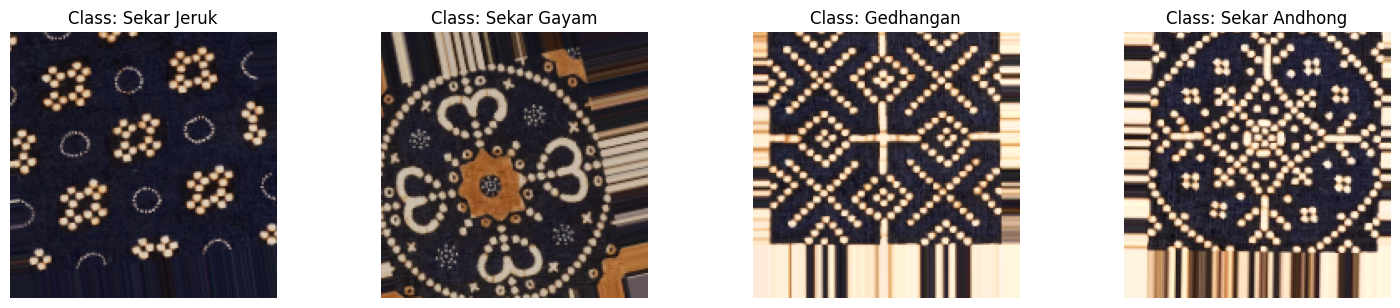

In [10]:
# Ambil satu batch gambar hasil augmentasi dari generator training
augmented_images, labels = next(train_generator)

class_names = sorted(os.listdir(train_dir))

# Tampilkan gambar hasil augmentasi (sesuai batch size)
batch_size = len(augmented_images)
print(f"📊 Batch size: {batch_size}")

# Tentukan layout subplot berdasarkan batch size
if batch_size <= 8:
    rows, cols = 2, 4
elif batch_size <= 12:
    rows, cols = 3, 4
elif batch_size <= 16:
    rows, cols = 4, 4
else:
    rows, cols = 5, 4

plt.figure(figsize=(15, 3*rows))  # Ukuran plot disesuaikan

for i in range(batch_size):  # Loop sesuai batch size
    plt.subplot(rows, cols, i + 1)  # Membuat subplot sesuai layout
    plt.imshow(augmented_images[i])  # Tampilkan gambar ke-i
    # Menampilkan nama kelas berdasarkan posisi label one-hot
    plt.title(f"Class: {class_names[labels[i].argmax()]}")
    plt.axis('off')  # Hilangkan sumbu koordinat untuk tampilan bersih

plt.tight_layout()  # Atur tata letak agar tidak saling tumpang tindih
plt.show()  # Tampilkan semua subplot

## 🧠 Modelling - Transfer Learning untuk Klasifikasi Batik - Transfer Learning untuk Klasifikasi Batik - Transfer Learning untuk Klasifikasi Batik - Transfer Learning untuk Klasifikasi Batik

#### 🏗️ Arsitektur ModelMembangun struktur CNN menggunakan Transfer Learning dengan model pretrained MobileNetV2 untuk klasifikasi batik.

**MobileNetV2** adalah arsitektur jaringan saraf tiruan (neural network) yang dirancang oleh Google untuk **mengenali gambar dengan cepat dan efisien**, **terutama di perangkat seluler**. Model ini bekerja seperti "otak buatan" yang dilatih untuk mengenali objek dalam gambar, misalnya membedakan antara berbagai pola batik. Keunggulan utamanya adalah ringan dan cepat, sehingga cocok digunakan di aplikasi mobile tanpa membutuhkan komputer besar. MobileNetV2 menggunakan teknik khusus agar tetap akurat meskipun ukurannya kecil, membuatnya ideal untuk digunakan dalam aplikasi yang membutuhkan pengenalan gambar secara real-time.

In [11]:
# Load pre-trained MobileNetV2
base_model = MobileNetV2(
    input_shape=(*IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

# 1. Freeze semua layer pada awalnya
base_model.trainable = False

# 2. Bangun model dengan layer tambahan
model = Sequential([
    base_model,  # feature extractor
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(60, activation='softmax')  # Ubah sesuai jumlah kelas kamu
])

# Kompilasi model dengan Adam optimizer dan categorical crossentropy
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Cocok untuk multi-class classification
    metrics=['accuracy']              # Evaluasi menggunakan akurasi
)

I0000 00:00:1753936609.899688    3008 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1753 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Kode berikut membangun arsitektur deep learning menggunakan **MobileNetV2** sebagai **feature extractor** dengan bobot pralatih dari ImageNet. Bagian atas (top layer) dihilangkan agar bisa diganti dengan layer khusus untuk klasifikasi dataset batik kita. Model ditambahkan dengan layer Conv2D dan pooling, lalu diratakan menggunakan `GlobalAveragePooling2D`, diikuti dua layer Dense untuk menghasilkan output klasifikasi ke 60 jenis batik. Base model dibekukan agar bobotnya tidak ikut dilatih, sehingga pelatihan lebih cepat dan fokus pada layer baru.

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 5, 5, 64)       │       737,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 60)             │         7,740 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,011,388 (11.49 MB)

 Trainable params: 753,404 (2.87 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [13]:
# EarlyStopping: hentikan training jika val_accuracy tidak membaik selama 3 epoch
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# ModelCheckpoint: simpan model terbaik ke file berdasarkan val_accuracy
model_checkpoint = ModelCheckpoint(
    'mymodel.keras',
    monitor='val_accuracy',
    save_best_only=True
)

# ReduceLROnPlateau: turunkan learning rate jika val_loss stagnan
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# Hitung class weights agar model tidak bias ke kelas mayoritas
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

# Custom Callback: cetak akurasi training & validasi setelah tiap epoch
class CustomCallback(Callback):
    """Callback untuk memonitor progress training"""

    def on_epoch_begin(self, epoch, logs=None):
        print(f"\n📚 Epoch {epoch + 1}/{self.params['epochs']} dimulai. Semoga bagus ya, Mas!")

    def on_epoch_end(self, epoch, logs=None):
        # Format metrik dengan presisi 4 digit
        metrics_str = " | ".join([f"{k}: {v:.4f}" for k, v in logs.items()])
        print(f"✅ Selesai Epoch {epoch + 1} — {metrics_str}")
        
        val_acc = logs.get('val_accuracy')
        val_loss = logs.get('val_loss')
        # Motivasi berdasar akurasi
        if val_acc is not None:
            if val_acc >= 0.85:
                print("🔥 Wihh model yang ini Gacor, Mas!")
            elif val_acc < 0.60:
                print("📉 Belum optimal, Mas. Tenang, kita evaluasi bareng ✨")
        

        # Reaksi tambahan berdasarkan val_loss stagnan
        if 'val_loss' in logs and epoch >= 3:
            print("Learning rate diturunkan, Mas biar lebih stabil 😎")

    def on_train_begin(self, logs=None):
        print("🚀 Training dimulai, Mas! Siapkan mental dan kopi...")

    def on_train_end(self, logs=None):
        print("🎉 Training selesai! Model telah mencapai epoch terakhir atau dihentikan lebih awal.")
        print("Training dihentikan lebih awal, Mas. Model sudah cukup baik 😌")

custom_logger = CustomCallback()

*Callback* digunakan untuk membantu proses pelatihan berjalan lebih efisien dan akurat. `EarlyStopping` menghentikan training jika akurasi validasi tidak membaik setelah beberapa epoch. `ModelCheckpoint` menyimpan model terbaik berdasarkan akurasi validasi. `ReduceLROnPlateau` menurunkan learning rate jika validasi loss stagnan. Selain itu, ditambahkan juga *class weights* untuk mengatasi ketidakseimbangan kelas dalam data, dan *custom callback* untuk mencetak akurasi secara langsung di akhir setiap epoch.

#### 🚀 Training ModelMelatih model menggunakan data latih dan validasi, serta memantau metrik performa.

In [14]:
# Training model

# =========== TRACKING WAKTU TRAINING ===========
baseline_tracker.track_training_start()


history = model.fit(
    train_generator,
    epochs=35,
    validation_data=val_generator,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, model_checkpoint, reduce_lr, custom_logger]
)

🚀 Mulai training model: baseline_model
🚀 Training dimulai, Mas! Siapkan mental dan kopi...

📚 Epoch 1/35 dimulai. Semoga bagus ya, Mas!
Epoch 1/35


I0000 00:00:1753936615.949360    3169 service.cc:152] XLA service 0x7fa058003090 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753936615.949440    3169 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-07-31 11:36:56.076899: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1753936617.114349    3169 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-07-31 11:36:58.210839: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4179', 8 bytes spill stores, 8 bytes spill loads



  5/180 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.1142 - loss: 5.1465 

I0000 00:00:1753936626.830725    3169 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0629 - loss: 4.2670✅ Selesai Epoch 1 — accuracy: 0.1014 | loss: 3.8431 | val_accuracy: 0.2500 | val_loss: 2.9060 | learning_rate: 0.0010
📉 Belum optimal, Mas. Tenang, kita evaluasi bareng ✨
180/180 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.0631 - loss: 4.2647 - val_accuracy: 0.2500 - val_loss: 2.9060 - learning_rate: 0.0010

📚 Epoch 2/35 dimulai. Semoga bagus ya, Mas!
Epoch 2/35
178/180 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3188 - loss: 2.6963✅ Selesai Epoch 2 — accuracy: 0.4111 | loss: 2.2745 | val_accuracy: 0.5389 | val_loss: 1.5683 | learning_rate: 0.0010
📉 Belum optimal, Mas. Tenang, kita evaluasi bareng ✨
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.3203 - loss: 2.6892 - val_accuracy: 0.5389 - val_loss: 1.5683 - learning_rate: 0.0010

📚 Epoch 3/35 dimulai. Semoga bagus ya, Mas!
Epoch 3/35
178/180 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6350 - loss: 1.2695✅ Selesai Epoch 3 — accuracy: 0.6611

## 📊 Evaluasi dan Visualisasi

#### 📈 Akurasi Training dan TestingMenghitung performa model di data pelatihan dan pengujian.

In [15]:
# Evaluasi model pada dataset test
import json

# =========== TRACKING WAKTU EVALUASI ===========
baseline_tracker.track_evaluation_start()


test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")  # Cetak akurasi pada test set

# =========== SELESAI EVALUASI ===========
baseline_tracker.track_evaluation_end()
baseline_tracker.end_tracking()

# =========== SIMPAN HASIL TIMING ===========
timing_results = baseline_tracker.save_timing_results('baseline_model_timing_results.json')

print("\n📊 RINGKASAN WAKTU KOMPUTASI BASELINE MODEL:")
print(f"⏱️  Total waktu: {timing_results['total_time_minutes']:.2f} menit")
print(f"🚀 Waktu training: {timing_results['training_time_minutes']:.2f} menit")
print(f"📊 Waktu evaluasi: {timing_results['evaluation_time_minutes']:.2f} menit")
print(f"📅 Mulai: {timing_results['start_datetime']}")
print(f"📅 Selesai: {timing_results['end_datetime']}")



# Ambil nilai akurasi terakhir dari proses training
train_acc = history.history['accuracy'][-1]  # Mengakses akurasi epoch terakhir
print(f"Training Accuracy: {train_acc:.4f}")  # Cetak akurasi training

📊 Mulai evaluasi model: baseline_model
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9595 - loss: 0.1292
Test Accuracy: 0.9500
✅ Evaluasi selesai dalam 0.75 detik
⏱️  Total waktu komputasi: 201.12 detik
📅 Waktu selesai: 2025-07-31 11:39:42
💾 Hasil timing disimpan: baseline_model_timing_results.json

📊 RINGKASAN WAKTU KOMPUTASI BASELINE MODEL:
⏱️  Total waktu: 3.35 menit
🚀 Waktu training: 0.00 menit
📊 Waktu evaluasi: 0.01 menit
📅 Mulai: 2025-07-31 11:36:21
📅 Selesai: 2025-07-31 11:39:42
Training Accuracy: 0.9875


#### 🖼️ Plot Akurasi dan Loss ModelMenampilkan grafik untuk memahami proses pelatihan model.

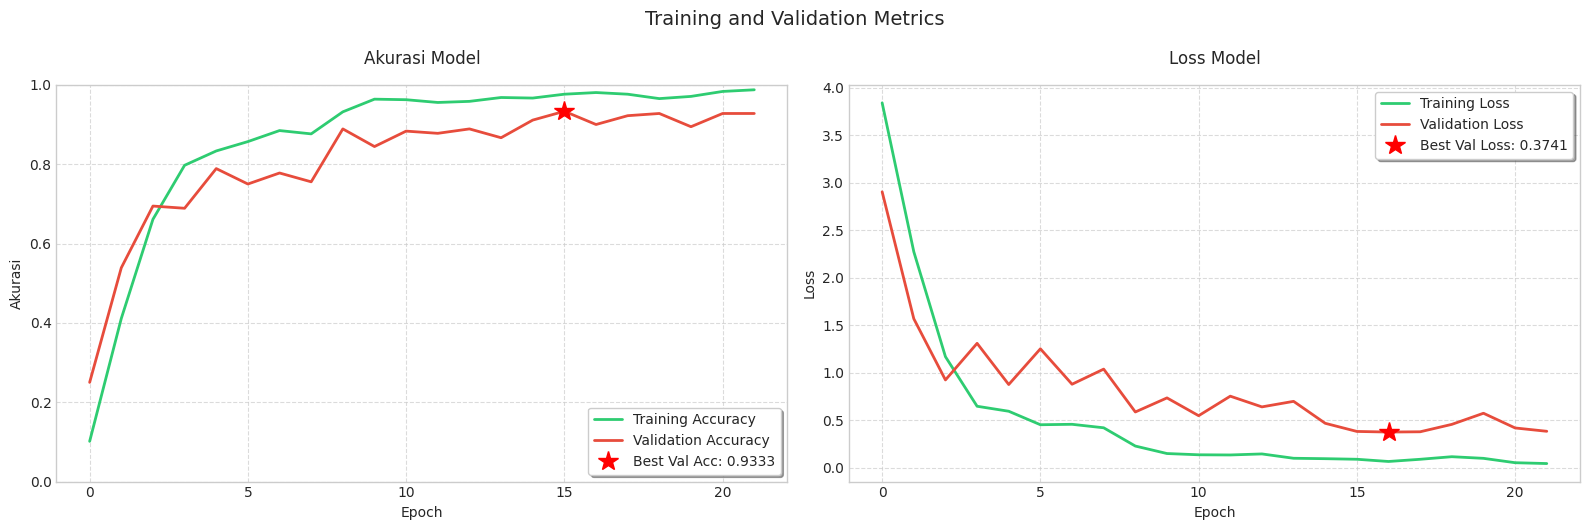


Best Validation Loss: 0.3741 (Epoch 17)
Best Validation Accuracy: 0.9333 (Epoch 16)


In [16]:

def plot_history_custom(history, figsize=(16,5)):
    plt.style.use("seaborn-v0_8-whitegrid")

    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Plot Akurasi
    axes[0].plot(history.history['accuracy'], label='Training Accuracy', color='#2ecc71', linewidth=2)
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='#e74c3c', linewidth=2)
    axes[0].set_title('Akurasi Model', fontsize=12, pad=15)
    axes[0].set_xlabel('Epoch', fontsize=10)
    axes[0].set_ylabel('Akurasi', fontsize=10)
    axes[0].set_ylim([0,1])
    axes[0].grid(True, linestyle='--', alpha=0.7)
    axes[0].legend(frameon=True, fancybox=True, shadow=True, loc='lower right')

    # Tandai best validation accuracy dengan bintang merah
    best_val_acc_epoch = np.argmax(history.history['val_accuracy'])
    axes[0].plot(best_val_acc_epoch, history.history['val_accuracy'][best_val_acc_epoch],
                 'r*', markersize=15,
                 label=f'Best Val Acc: {history.history["val_accuracy"][best_val_acc_epoch]:.4f}')
    axes[0].legend(frameon=True, fancybox=True, shadow=True, loc='lower right')

    # Plot Loss
    axes[1].plot(history.history['loss'], label='Training Loss', color='#2ecc71', linewidth=2)
    axes[1].plot(history.history['val_loss'], label='Validation Loss', color='#e74c3c', linewidth=2)
    axes[1].set_title('Loss Model', fontsize=12, pad=15)
    axes[1].set_xlabel('Epoch', fontsize=10)
    axes[1].set_ylabel('Loss', fontsize=10)
    axes[1].grid(True, linestyle='--', alpha=0.7)
    axes[1].legend(frameon=True, fancybox=True, shadow=True, loc='upper right')

    # Tandai best validation loss dengan bintang merah
    best_val_loss_epoch = np.argmin(history.history['val_loss'])
    axes[1].plot(best_val_loss_epoch, history.history['val_loss'][best_val_loss_epoch],
                 'r*', markersize=15,
                 label=f'Best Val Loss: {history.history["val_loss"][best_val_loss_epoch]:.4f}')
    axes[1].legend(frameon=True, fancybox=True, shadow=True, loc='upper right')

    plt.tight_layout()
    fig.suptitle('Training and Validation Metrics', fontsize=14, y=1.05)
    plt.show()

    print(f"\nBest Validation Loss: {history.history['val_loss'][best_val_loss_epoch]:.4f} (Epoch {best_val_loss_epoch + 1})")
    print(f"Best Validation Accuracy: {history.history['val_accuracy'][best_val_acc_epoch]:.4f} (Epoch {best_val_acc_epoch + 1})")

# Contoh pemakaian:
plot_history_custom(history)

Grafik di atas menunjukkan perkembangan kinerja model selama proses pelatihan (training) dalam dua aspek utama: **akurasi** (grafik kiri) dan **loss** atau kesalahan prediksi (grafik kanan), baik untuk data training maupun validasi (uji coba).Pada grafik **Akurasi Model** di kiri, terlihat bahwa akurasi model terus meningkat seiring bertambahnya jumlah epoch (putaran pelatihan), baik untuk data training maupun data validasi. Hal ini berarti model semakin baik dalam mengenali pola data. Di akhir pelatihan, akurasi mencapai 98%, baik pada data pelatihan maupun validasi, yang menunjukkan bahwa model telah belajar dengan sangat baik dan mampu mengenali data baru dengan cukup akurat.Sementara itu, pada grafik **Loss Model** di kanan, terlihat bahwa nilai loss pada data training turun secara konsisten, hal ini menandakan bahwa kesalahan model dalam memprediksi semakin kecil. Loss pada data validasi juga menurun drastis, meskipun sempat naik-turun sedikit di tengah jalan, namun akhirnya menurun hingga sangat kecil. Hal ini menunjukkan bahwa model tidak hanya belajar dari data pelatihan, tetapi juga bisa menggeneralisasi (beradaptasi) dengan baik pada data yang belum pernah dilihat sebelumnya.Secara keseluruhan, grafik ini menunjukkan bahwa proses pelatihan berjalan dengan baik, dan model yang dihasilkan sangat akurat serta tidak mengalami overfitting yang berarti.

#### 📋 Classification Report & 🔢 Confusion Matrix - Evaluasi Klasifikasi Batik - Evaluasi Klasifikasi Batik - Evaluasi Klasifikasi Batik - Evaluasi Klasifikasi BatikMenampilkan jumlah prediksi benar dan salah untuk tiap kelas dalam bentuk matriks.Menampilkan precision, recall, dan f1-score tiap kelas.

45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


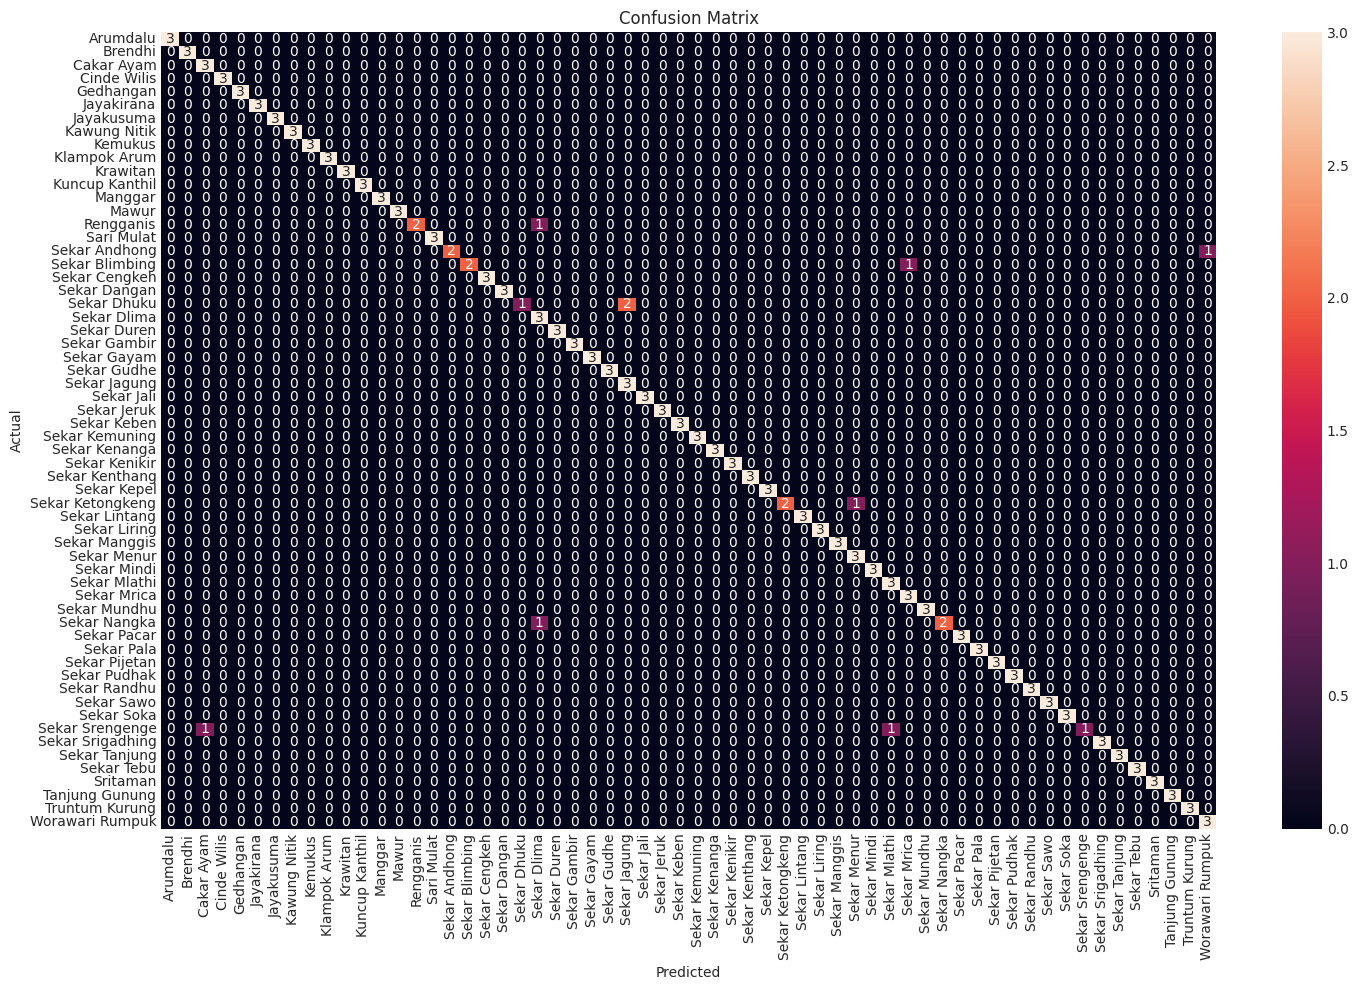

                  precision    recall  f1-score   support

        Arumdalu       1.00      1.00      1.00         3
         Brendhi       1.00      1.00      1.00         3
      Cakar Ayam       0.75      1.00      0.86         3
     Cinde Wilis       1.00      1.00      1.00         3
       Gedhangan       1.00      1.00      1.00         3
      Jayakirana       1.00      1.00      1.00         3
      Jayakusuma       1.00      1.00      1.00         3
    Kawung Nitik       1.00      1.00      1.00         3
         Kemukus       1.00      1.00      1.00         3
    Klampok Arum       1.00      1.00      1.00         3
        Krawitan       1.00      1.00      1.00         3
  Kuncup Kanthil       1.00      1.00      1.00         3
         Manggar       1.00      1.00      1.00         3
           Mawur       1.00      1.00      1.00         3
       Rengganis       1.00      0.67      0.80         3
      Sari Mulat       1.00      1.00      1.00         3
   Sekar Andh

In [17]:
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()

report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)


Grafik di atas adalah **confusion matrix**, yang menunjukkan seberapa baik model mengenali gambar dari masing-masing kategori pola batik, termasuk berbagai penyakit dan kondisi sehat. Baris menunjukkan label sebenarnya (kondisi yang benar) dan kolom menunjukkan label yang diprediksi oleh model.Dari grafik ini, kita bisa melihat bahwa sebagian besar kotak berwarna biru tua berada di diagonal (kiri atas ke kanan bawah), yang artinya model sering memprediksi dengan benar. Namun, ada beberapa kasus di mana model masih melakukan kesalahan.Secara keseluruhan, model ini sudah sangat baik dalam mengklasifikasikan gambar dengan akurat, meskipun masih ada sedikit kebingungan antara beberapa penyakit yang mungkin mirip secara tampilan.

Hasil di atas menunjukkan seberapa baik model mengenali berbagai jenis penyakit pola batik dan kondisi sehat. Tiga metrik utama yang ditampilkan adalah:- **Precision** (ketepatan): Seberapa banyak prediksi benar dari semua yang diprediksi sebagai suatu kelas.- **Recall** (cakupan): Seberapa banyak data benar yang berhasil dikenali model.- **F1-score**: Rata-rata harmonis dari precision dan recall, menunjukkan keseimbangan antara keduanya.Model ini menunjukkan performa yang sangat baik, meskipun ada sedikit penurunan pada beberapa kategori. Secara umum performa model sudah sangat baik dan dapat diandalkan untuk mengenali penyakit pola batik dari gambar.

## 🔄 Konversi ModelMengubah model ke format SavedModel, TF-Lite dan TFJS.

In [ ]:
# Load model dari file .keras
model_convert = tf.keras.models.load_model("mainmodel.keras")

# Fungsi untuk menyimpan labels.txt
def save_labels(class_names, output_path="labels.txt"):
    with open(output_path, "w") as f:
        for label in class_names:
            f.write(f"{label}\n")

# 1. Simpan ke format SavedModel
saved_model_path = "saved_model"
model_convert.export(saved_model_path)

# 2. Simpan ke format TFLite
def save_as_tflite(model, output_path):
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    with open(output_path, "wb") as f:
        f.write(tflite_model)

tflite_output_path = "tflite/model.tflite"
save_as_tflite(model_convert, tflite_output_path)
print(f"✅ Model disimpan sebagai SavedModel di: {saved_model_path}")

# Simpan label.txt untuk TFLite
save_labels(class_names, output_path="tflite/labels.txt")
print(f"✅ Model disimpan sebagai TFLite di: {tflite_output_path}")

# 3. Simpan ke format TF.js
def save_as_tfjs(model, output_path):
    tfjs.converters.save_keras_model(model, output_path)

tfjs_output_path = "tfjs_model"
save_as_tfjs(model_convert, tfjs_output_path)

# Simpan label.txt untuk TFJS (opsional: bisa di dalam folder TFJS juga)
save_labels(class_names, output_path="tfjs_model/labels.txt")
print(f"✅ Model disimpan sebagai TensorFlow.js di: {tfjs_output_path}")

print("✅ Model berhasil disimpan dalam format: SavedModel (.pb), TFLite (.tflite), TensorFlow.js (TFJS), dan labels.txt")


ValueError: File not found: filepath=mainModel.keras. Please ensure the file is an accessible `.keras` zip file.

## 🤖 InferenceMenggunakan model yang sudah dilatih untuk memprediksi gambar.

In [ ]:
# Load model
model_pred = TFSMLayer('saved_model', call_endpoint='serving_default')

# Ambil nama-nama kelas
data_dir = 'dataset_split/test'  # contoh: 'dataset/test'
class_names = sorted(os.listdir(data_dir))
samples_per_class = 1  # jumlah gambar diambil per kelas

# Kumpulan hasil prediksi untuk visualisasi
images, titles = [], []

# Ambil dan proses gambar
for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    image_files = os.listdir(class_path)
    selected_files = np.random.choice(image_files, size=samples_per_class, replace=False)

    for img_file in selected_files:
        img_path = os.path.join(class_path, img_file)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        preds_dict = model_pred(img_array, training=False)
        preds = list(preds_dict.values())[0]
        predicted_index = np.argmax(preds)
        predicted_label = class_names[predicted_index]
        confidence = np.max(preds) * 100

        # Simpan untuk plotting
        images.append(img)
        titles.append(f"Aktual: {class_name}\nPrediksi: {predicted_label}\nKonf: {confidence:.1f}%")

# Plot grid 3 kolom
cols = 3
rows = int(np.ceil(len(images) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

for idx, ax in enumerate(axes.flat):
    if idx < len(images):
        ax.imshow(images[idx])
        ax.set_title(titles[idx])
        ax.axis('off')
    else:
        ax.axis('off')  # kosongkan sisa slot

plt.tight_layout()
plt.show()

OSError: SavedModel file does not exist at: saved_model/{saved_model.pbtxt|saved_model.pb}

: 

Gambar ini menunjukkan hasil prediksi model terhadap berbagai jenis penyakit pola batik berdasarkan citra daun. Setiap gambar menampilkan **label asli (aktual)**, **hasil prediksi model**, dan **tingkat kepercayaan (konfidensi)** model terhadap prediksinya. Dari semua contoh, hampir seluruh gambar berhasil diprediksi **dengan benar** dan **tingkat kepercayaan yang sangat tinggi** (sebagian besar mendekati 100%). Hal ini menunjukkan bahwa model dapat **mengenali gejala penyakit pola batik dengan sangat akurat**, seperti *Bacterial_spot*, *Early_blight*, *Leaf Mold*, hingga kondisi *healthy* (daun sehat).Secara keseluruhan, model mampu mendeteksi penyakit daun dari gambar secara sangat efektif dan bisa menjadi **alat bantu yang bermanfaat bagi petani atau praktisi pertanian** untuk mendeteksi penyakit sejak dini.